## Deep Learning: Assignment 1: Perceptrons

In [1]:
# Enter your own information here!
student_name = 'Fadi Helal'
student_id = '2312951'

## Assignment 1-1
### Topic: Happiness, Classifier: Perceptron (3 p)

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.
Note! the file is UTF-16 encoded, so you need to set encoding when reading.

In [17]:
# Note! Implementation code of preprocessing is already written in this assignment.
import pandas as pd

df = pd.read_csv('./data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
Use random seed `9001`.

In [18]:
# TODO: Type your implementation in this cell.
# TODO: Split the dataset
from sklearn.model_selection import train_test_split
X = df[feature_columns]  # Features
y = df['happy']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

In [19]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

In [20]:
# Type your implementation in this cell.
from sklearn.linear_model import Perceptron
pc = Perceptron(random_state=9001)
pc.fit(X_train, y_train)

Perceptron(random_state=9001)

In [21]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.
print(f'Perceptron average test accuracy: {pc.score(X_test, y_test)}')

Perceptron average test accuracy: 0.4583333333333333


In [22]:
# TODO: Type your implementation in this cell.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)

# Make the classification report
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculating the ROC curve and AUC 
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Reflection - thoughts of ROC curve and accuracy.
reflection = """
The ROC curve illustrates the performance of the classification model at all classification thresholds. 
This curve plots two parameters: True Positive Rate and False Positive Rate. 
AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
An AUC of 0.5 suggests no discrimination capacity, equivalent to random guessing. Ooooops -_^
"""

Classification report:
               precision    recall  f1-score   support

           0       0.48      0.83      0.61        24
           1       0.33      0.08      0.13        24

    accuracy                           0.46        48
   macro avg       0.40      0.46      0.37        48
weighted avg       0.40      0.46      0.37        48

Confusion matrix:
 [[20  4]
 [22  2]]
auc: 0.5130208333333334
Reflection: 
The ROC curve illustrates the performance of the classification model at all classification thresholds. 
This curve plots two parameters: True Positive Rate and False Positive Rate. 
AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
An AUC of 0.5 suggests no discrimination capacity, equivalent to random guessing.



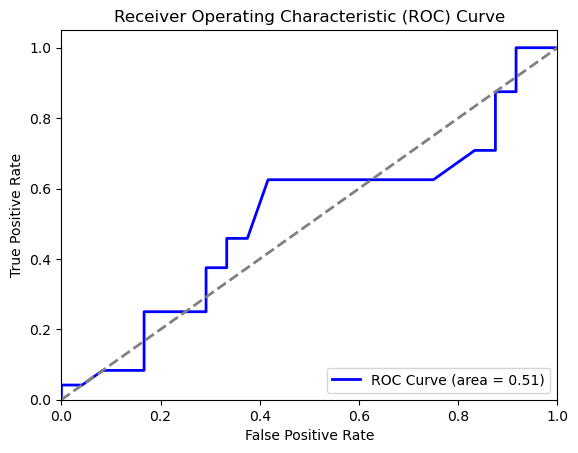

In [23]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {roc_auc}')
print(f'Reflection: {reflection}')

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Assignment 1-2
### Topic: Newsgroup messages with Perceptron (3 p)

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [29]:
# This implementation for Categories 

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(subset='train', categories=categories,
                               remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories,
                              remove=('headers', 'footers', 'quotes'))

# Initializin the TfidfVectorizer
Vectorizer = TfidfVectorizer()

# TODO: Transform the training data to numerical with the fit_transform() method
# TODO: Transform the test data using a different method
X_train = Vectorizer.fit_transform(ng_train.data)
X_test = Vectorizer.transform(ng_test.data)

y_train = ng_train.target
y_test = ng_test.target


1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [30]:
# TODO: Type your implementation in this cell.
pc = Perceptron(random_state=12501)
pc.fit(X_train, y_train)

# Predicting
y_pred = pc.predict(X_test)
# Using Decision_function because Perceptron doesn;t have its own probabilities predicting method. 
y_score = pc.decision_function(X_test)

# making the classification report and the confusion matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Classification report:\n', cr)
print('Confusion matrix:\n', cm)

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192

Confusion matrix:
 [[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]


In [31]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(cm) # compare the actual values with the predictions
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix.

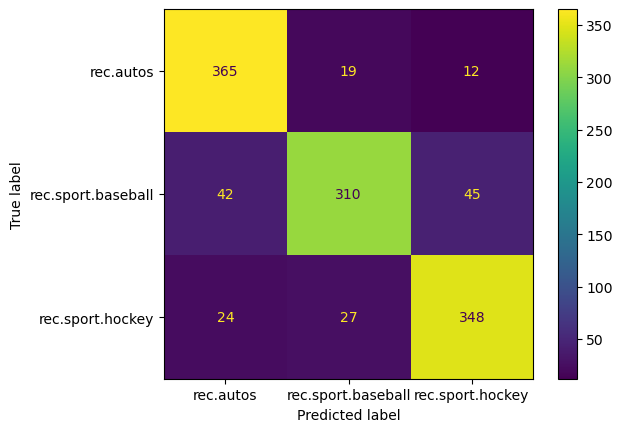

In [32]:
# TODO: plot the confusion matrix
ConfusionMatrixDisplay(cm, display_labels=ng_train.target_names).plot()
plt.show()

# Assignment 1-3) (2 p) Another newgroup classifier

Do the same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [59]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

# Fetching the training and testing datasets
ng_train_2 = fetch_20newsgroups(subset='train', categories=categories_2, remove=('headers', 'footers', 'quotes'))
ng_test_2 = fetch_20newsgroups(subset='test', categories=categories_2, remove=('headers', 'footers', 'quotes'))

# Vectorizing the datasets
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(ng_train.data)
X_test = vectorizer.transform(ng_test.data)

# Setting the target variables
y_train = ng_train.target
y_test = ng_test.target

# Initializing and training the Perceptron classifier
clf = Perceptron(random_state=12501)
clf.fit(X_train, y_train)

# Making predictions with the trained classifier
y_pred = clf.predict(X_test)
# Perceptron does not have a method for predict_proba, so we use decision_function for confidence scores
y_score = clf.decision_function(X_test)

# Generating the classification report and confusion matrix
cr = classification_report(y_test, y_pred, target_names=ng_test.target_names)
cm = confusion_matrix(y_test, y_pred)

# Printing the classification report and confusion matrix
print('Classification report for categories_2:\n', cr)
print('Confusion matrix for categories_2:\n', cm)

# Reflection
reflection_2 = """
Reflection:
Reflecting on the outcomes with two different newsgroup categories, the shift in the accuracy likely comes from the inherent 
complexity and similarity of topics in the second set. Unlike the broader themes in the first, the computer-related groups 
blend together, challenging the Perceptron to to find distinctions. This scenario nicely illustrates how closely 
related topics can test the limits of the most straightforward models.
Very Interesting, quite challenging tasks in the deep learning, hopefully my code is correct =)) 
"""
print(reflection)

Classification report for categories_2:
                     precision    recall  f1-score   support

         rec.autos       0.85      0.92      0.88       396
rec.sport.baseball       0.87      0.78      0.82       397
  rec.sport.hockey       0.86      0.87      0.87       399

          accuracy                           0.86      1192
         macro avg       0.86      0.86      0.86      1192
      weighted avg       0.86      0.86      0.86      1192

Confusion matrix for categories_2:
 [[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]

The ROC curve illustrates the performance of the classification model at all classification thresholds. 
This curve plots two parameters: True Positive Rate and False Positive Rate. 
AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
An AUC of 0.5 suggests no discrimination capacity, equivalent to ra

In [60]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the task.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {clf.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))
print(classification_report(ng_test.target, y_pred))

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix with `categories_2` data.

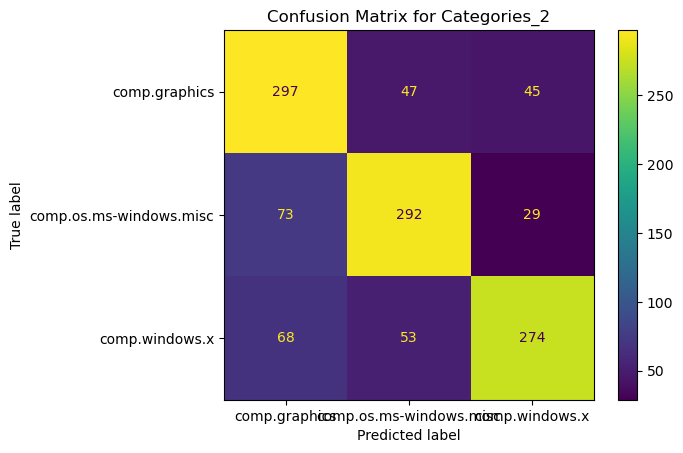

In [53]:
# TODO: Plot the confusion matrix
ConfusionMatrixDisplay(cm_2, display_labels=ng_train_2.target_names).plot()
plt.title('Confusion Matrix for Categories_2')
plt.show()